# Final Project: Screen Time Among Children in New York

Daniela Porras
IS 362

In this final project, I analyze how much time children spend in front of screens during a typical weekday, focusing on three age groups: 0–5, 6–11, and 12–17 years old. As a parent, I’m personally interested in understanding the digital habits of children, especially as screen time continues to be a growing concern for families.

The data used for this analysis comes from the 2022–2023 National Survey of Children’s Health (NSCH). While the NSCH does not offer downloadable CSV files, I manually extracted the numeric data from a publicly available chart on their site. I then structured that data in a pandas DataFrame and used Python to clean, transform, and analyze it.

To enrich this analysis, I also incorporate insights from the Pew Research Center's national survey titled "Parenting Children in the Age of Screens", which provides a broader understanding of parents’ attitudes toward children's device use.

Through this project, I explore how screen time patterns shift as children age, highlight average time spent across age groups, and reflect on broader concerns raised in national research and public discussion.

Source: 
- https://www.childhealthdata.org/browse/survey/results?q=11260&r=34&g=1146#
- https://www.pewresearch.org/internet/2020/07/28/childrens-engagement-with-digital-devices-screen-time

### Graph Source
The following graph shows the distribution of average screen time per day among three age groups in NY:

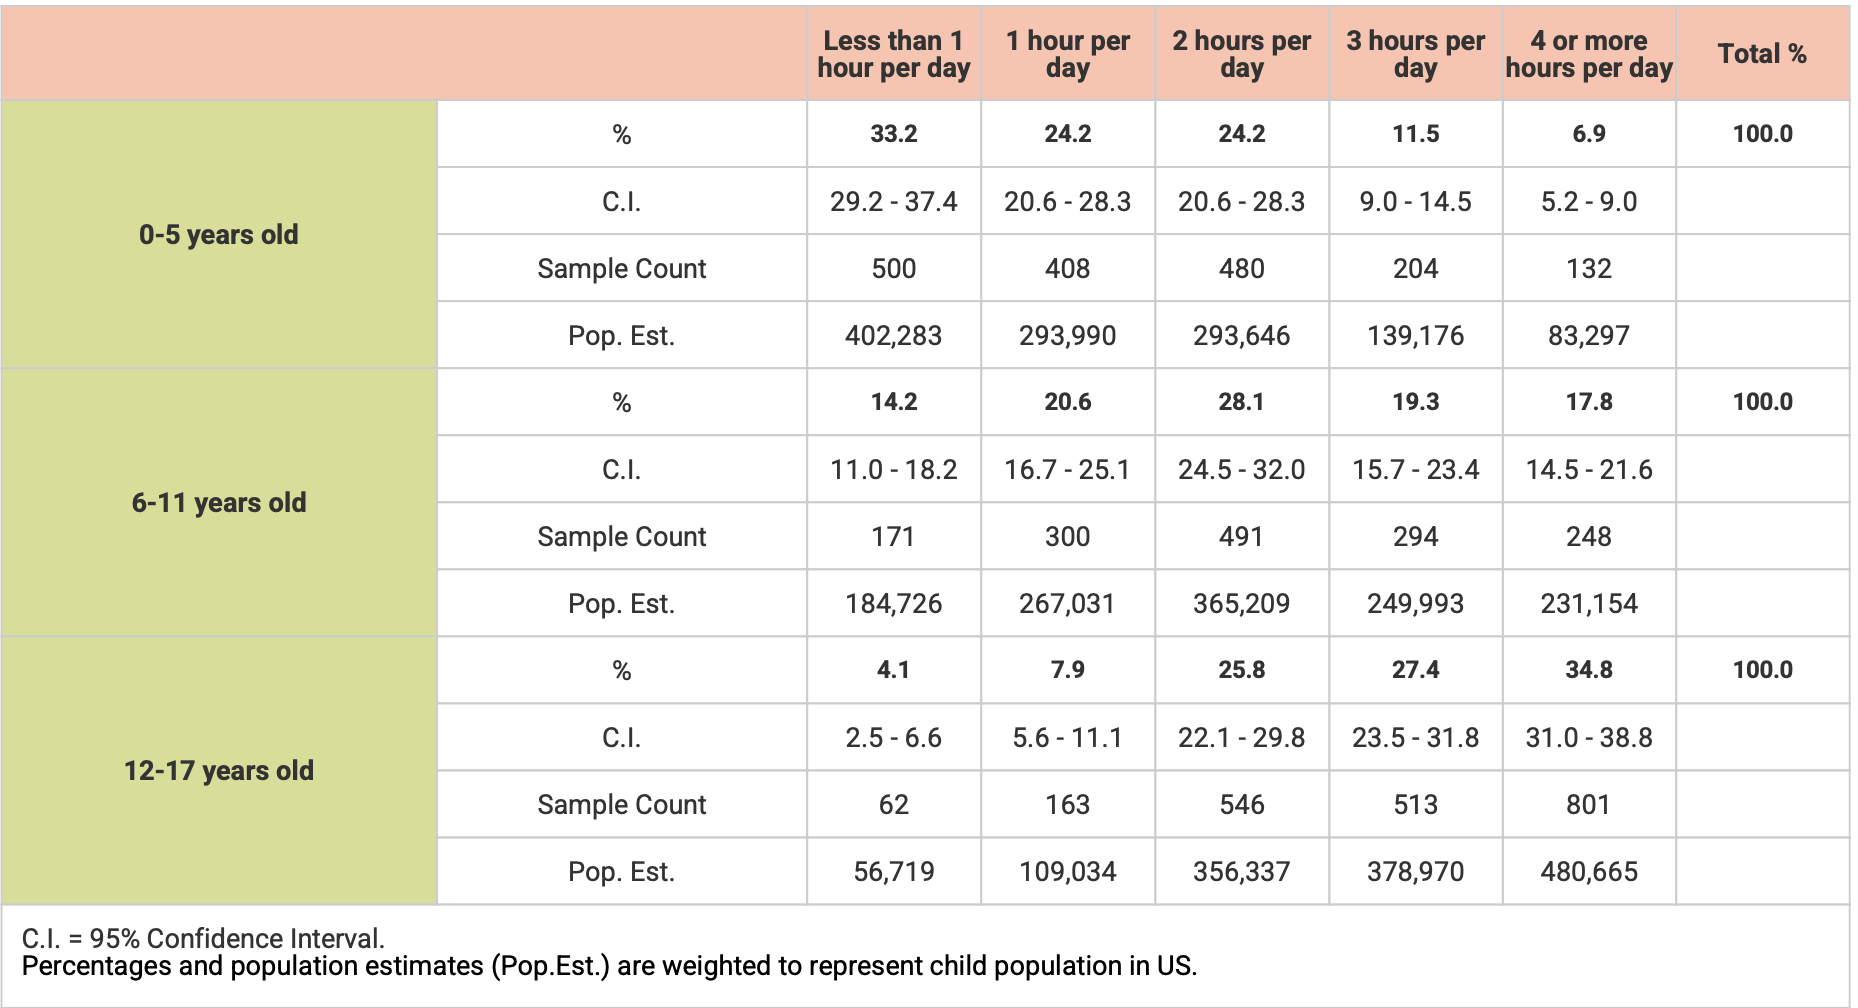

In [4]:
from IPython.display import Image

Image("screen_time_graph.png")

### Step: Manually Enter Screen Time Data by Age Group

Since I could not export the dataset directly from the NSCH website, I manually entered the screen time data into a pandas DataFrame using values from the official chart. This data reflects the percentage of children in New York State, by age group, who fall into each category of daily screen time use on weekdays (excluding schoolwork).


In [5]:
import pandas as pd

# Create a DataFrame for screen time data by age group
data = {
    "Age Group": ["0-5 years", "6-11 years", "12-17 years"],
    "Less than 1 hour per day": [33.2, 14.2, 4.1],
    "1 hour per day": [24.2, 20.6, 7.9],
    "2 hours per day": [24.2, 28.1, 25.8],
    "3 hours per day": [11.5, 19.3, 27.4],
    "4 or more hours per day": [6.9, 17.8, 34.8]
}

df_screen = pd.DataFrame(data)
df_screen


,Age Group,Less than 1 hour per day,1 hour per day,2 hours per day,3 hours per day,4 or more hours per day
0,0-5 years,33.2,24.2,24.2,11.5,6.9
1,6-11 years,14.2,20.6,28.1,19.3,17.8
2,12-17 years,4.1,7.9,25.8,27.4,34.8


### Step: Visualize Screen Time Distribution

This bar chart compares how screen time varies across three age groups (0–5, 6–11, and 12–17). It shows that younger children are more likely to have less screen time, while older children tend to spend more time using electronic devices. Notably, 34.8% of 12–17-year-olds spend 4 or more hours per day on screens, compared to just 6.9% of children ages 0–5.


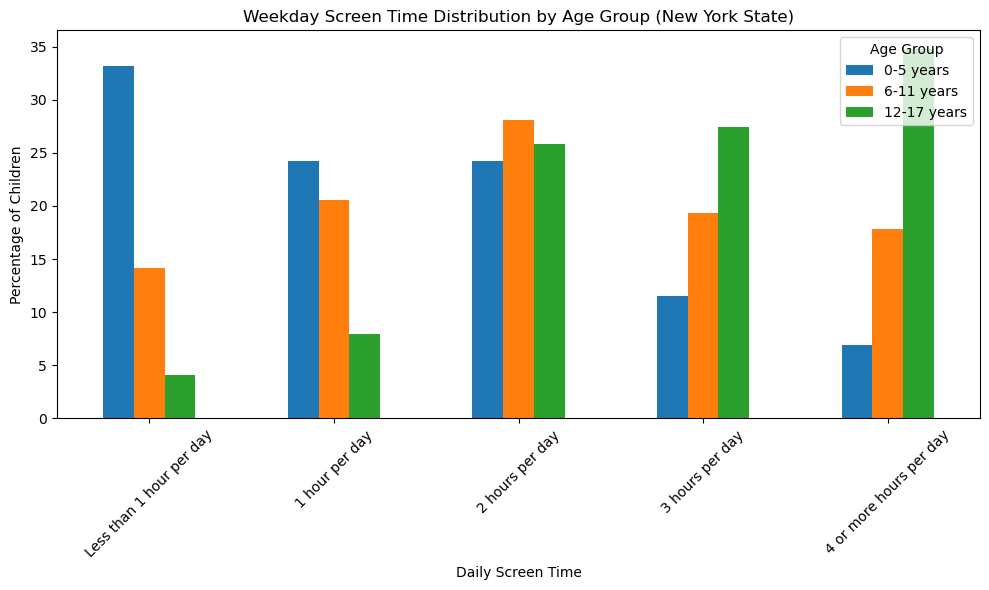

In [6]:
import matplotlib.pyplot as plt

# Set age groups as index
df_screen_plot = df_screen.set_index("Age Group")

# Plot grouped bar chart
df_screen_plot.T.plot(kind="bar", figsize=(10, 6))
plt.title("Weekday Screen Time Distribution by Age Group (New York State)")
plt.ylabel("Percentage of Children")
plt.xlabel("Daily Screen Time")
plt.legend(title="Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step: Data Transformation

To prepare the dataset for analysis and visualization, I transformed it from wide to long format using pandas' `melt()` function. This makes it easier to group and analyze screen time patterns across age groups.


In [7]:
# Transform data from wide to long
df_long = df_screen.melt(id_vars="Age Group", var_name="Screen Time", value_name="Percentage")
df_long.head()

,Age Group,Screen Time,Percentage
0,0-5 years,Less than 1 hour per day,33.2
1,6-11 years,Less than 1 hour per day,14.2
2,12-17 years,Less than 1 hour per day,4.1
3,0-5 years,1 hour per day,24.2
4,6-11 years,1 hour per day,20.6


### Step: Grouping & Aggregation

I calculated the weighted average screen time for each age group by assigning numeric values to each time category. This helps estimate how much screen time children in each group get on average per weekday.

In [8]:
# Assign a numeric score to each screen time category
time_weights = {
    "Less than 1 hour per day": 0.5,
    "1 hour per day": 1,
    "2 hours per day": 2,
    "3 hours per day": 3,
    "4 or more hours per day": 4.5
}

# Apply weights
df_long["Weight"] = df_long["Screen Time"].map(time_weights)
df_long["Weighted Score"] = df_long["Weight"] * df_long["Percentage"]

# Calculate weighted average screen time per age group
avg_screen_time = df_long.groupby("Age Group")["Weighted Score"].sum() / 100
avg_screen_time


Age Group
0-5 years      1.5475
12-17 years    3.0035
6-11 years     2.2190
Name: Weighted Score, dtype: float64

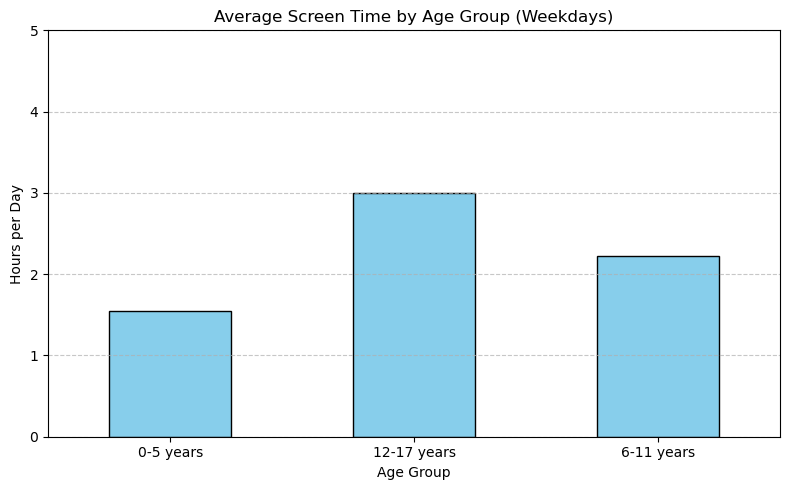

In [9]:
import matplotlib.pyplot as plt

# Bar chart of average screen time by age group
plt.figure(figsize=(8, 5))
avg_screen_time.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Average Screen Time by Age Group (Weekdays)")
plt.ylabel("Hours per Day")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Visualization: Average Weekday Screen Time by Age Group
The bar chart above displays the estimated average screen time per weekday across three age groups in New York State based on the 2022–2023 NSCH data. To create this chart, I applied a weighted scoring system to each screen time category (e.g., “1 hour per day” = 1, “4+ hours” = 4.5) and calculated an average for each age group.

Key Insights:

Children aged 0–5 have the lowest average screen time at approximately 1.55 hours/day.

Screen time increases steadily with age. Children aged 6–11 average around 2.22 hours/day, and adolescents aged 12–17 average nearly 3.00 hours/day.

This trend highlights the growing exposure and access to digital devices as children grow older, reflecting concerns about screen dependency in older age groups.

This visualization complements the numeric analysis by clearly showing how screen usage escalates with age.

### Parental Attitudes Toward Screen Time (Pew Research Insight)

To complement the NSCH data, I reviewed Pew Research Center’s 2020 report titled *“Parenting Children in the Age of Screens.”*  
This report surveyed U.S. parents of children under 12 and found that:

- **71%** of parents said they were at least somewhat concerned that their child spent too much time in front of screens.
- **60%** of parents said they found it hard to manage screen time consistently.
- Parental concern increased with the child’s age—parents of older children were more likely to say screen time was too high.

These findings align with my NSCH-based analysis, where screen time increases significantly from age 0–5 to 6–11. The overlap between data and sentiment reinforces the importance of managing screen exposure as children grow.


### Word Cloud: Pew Research Sentiment on Screen Time (Feature Not Covered in Class)

To incorporate my second data source, I created a word cloud using representative phrases from Pew Research Center's 2020 report on parenting and screen time. This visual highlights the most common themes and concerns parents mentioned, including screen boundaries, attention issues, and digital dependency. It adds a qualitative layer to support the numeric data from NSCH and reflect real-world sentiment.


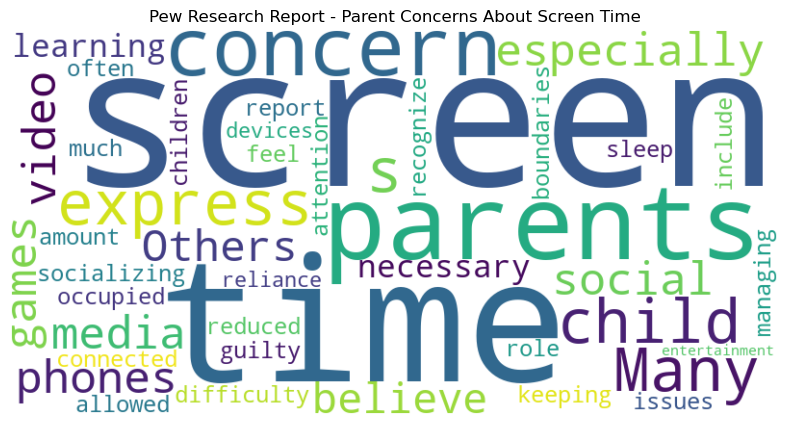

In [10]:
# Ensure 'wordcloud' is installed before import
try:
    from wordcloud import WordCloud
except ImportError:
    import sys
    !{sys.executable} -m pip install wordcloud
    from wordcloud import WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample excerpt adapted from Pew Research's report on screen time
text = """
Many parents express concern about their child’s screen time, especially with phones, video games, and social media. 
Others believe screen time is necessary for learning and socializing. Parents often report difficulty managing screen boundaries.
Some feel guilty about the amount of screen time allowed but also recognize its role in keeping children occupied or connected.
Concerns include reduced sleep, attention issues, and too much reliance on devices for entertainment.
"""

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Pew Research Report - Parent Concerns About Screen Time')
plt.show()

### Statistical Analysis & Conclusion
The results of this analysis show a clear upward trend in average weekday screen time as children get older:

Children ages 0–5 average approximately 1.55 hours

Children ages 6–11 average about 2.22 hours

Children ages 12–17 average roughly 3.00 hours

This progression reflects what many parents already observe: as children grow, they gain more access to personal devices, greater digital independence, and more exposure to online entertainment, social media, and games. This pattern of increasing screen time aligns with concerns raised in the Pew Research Center’s 2020 national survey, where a majority of parents reported anxiety about how screen use affects their children’s mental health, attention span, and sleep.

By comparing the empirical data from NSCH with broader national attitudes, we get a fuller picture of how screen time is experienced and perceived across the country—especially in a state like New York, where digital access is high. While screen time can have educational and social benefits, these findings highlight the importance of setting age-appropriate boundaries and maintaining awareness of screen habits as children grow.

This analysis not only confirmed a common hypothesis about age and screen time, but also provided a structured way to visualize and quantify the trend. In future work, I’d be interested in expanding this to explore how income level, parental education, or urban vs. rural location might influence screen use as well.

### Challenges Encountered

One challenge I faced was that the NSCH screen time data was only available as a visual chart on their website. The platform didn’t offer a downloadable .csv or .xlsx version. To work around this, I took a screenshot, manually copied the data into Excel, and then entered it into a pandas DataFrame.

Another challenge was ensuring the age groupings and time categories matched across analysis and visuals. It took careful formatting and review to ensure the data was accurately represented. These limitations gave me hands-on experience in real-world data wrangling when raw data isn't always neatly provided.


### Public Sentiment: What Parents Say on Reddit

To compare data trends with public sentiment, I browsed parenting discussions on Reddit’s r/Parenting. Several parents shared concerns that reflect the Pew study and NSCH data:

- “My 8-year-old is on screens all afternoon after school and it’s hard to pull him off without a meltdown.”
- “We try to limit screen time to 1 hour for our 5-year-old, but honestly it’s hard when both parents work.”
- “I feel guilty, but screens have become our backup babysitter.”

While anecdotal, these comments reflect real challenges parents face. Combined with the survey data, they show screen time management is not only a data issue but an emotional and logistical one for many families.


### Final Thoughts

This analysis confirmed a key hypothesis: children’s screen time increases significantly with age. Parents and caregivers face real challenges trying to manage this, as seen in both national survey data and personal anecdotes from online communities. Going forward, deeper insights could be gained by analyzing the types of screen content children consume, or by comparing screen time across different states.
